<a href="https://colab.research.google.com/github/Bangkit-JKT2-D/fruits-fresh-rotten-classification/blob/master/fresh-rotten-fruits2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import
The following code imports the necessary code to run the code in the rest of this Colaboratory.

In [0]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

import tensorflow as tf
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
print(tf.__version__)

2.2.0


## Download Dataset
Open this link to know how to get cookies.txt https://www.kaggle.com/general/51898

In [4]:
#upload kaggle cookies
files.upload()

Saving cookies.txt to cookies.txt


{'cookies.txt': b'# HTTP Cookie File downloaded with cookies.txt by Genuinous @genuinous\n# This file can be used by wget, curl, aria2c and other standard compliant tools.\n# Usage Examples:\n#   1) wget -x --load-cookies cookies.txt "https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification/metadata"\n#   2) curl --cookie cookies.txt "https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification/metadata"\n#   3) aria2c --load-cookies cookies.txt "https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification/metadata"\n#\nwww.kaggle.com\tFALSE\t/\tFALSE\t1605864030\tka_sessionid\td2e10809812a445d203c4deb1e76293d\n.kaggle.com\tTRUE\t/\tFALSE\t1654297403\t_ga\tGA1.2.439737057.1590104673\nwww.kaggle.com\tFALSE\t/\tTRUE\t1593143661\t.ASPXAUTH\tD7E34DA930A9A6B6D74653ED5B50D5ADAFA20E1E7D9BD2284D353A5706F38E4C5662184FC8744BA2AB29BF669DEA7A0F1F823CDC6C9A791D5360049A5C6D3DD60AB0FA3A20ED21CFFB42C4B66D820D8EECA81488\n.kaggle.com\tTRUE\t/\tFALSE\t1591311803

In [5]:
!wget --no-check-certificate -x --load-cookies cookies.txt \
  "https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification/download" \
  -O /tmp/data.zip

--2020-06-16 17:36:33--  https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification/download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/kaggle-data-sets/46490%2F84555%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1592588193&Signature=nZmPKtg5m4r%2BYiauYKF6%2BU65BZqz%2Bk9cKNQNr0NEN2DqPqFCm9Cds%2BDfDbJA7uHhjP9XAVeCoB3BGm0q2SDM7IgQTxr6O7P4HfdsOQT32t2IK6DJt1iTO5UEAhz3cF7iukAND15e7Uq%2FsWM3LTBKyB%2BNBREpiwvlbPCMNjGryOXAeRXnG%2FahB1KIK5Xys1feoO%2BbAoB9kOrGh4C9Tu4jmtXZ79qJYIgl%2FvV2nHggWVjUllh0smSRCVFcHqqVN735QN3OQCA2SNfoXUpIAh%2F7UVuz06GAIYTe0lGOcE7sArSp90BlY2c%2BytmT23ii0oGhJ3OmcEZN00BUdzUpxzC9OA%3D%3D [following]
--2020-06-16 17:36:34--  https://storage.googleapis.com/kaggle-data-sets/46490%2F84555%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-

## Extract Data

In [0]:
local_zip = '/tmp/data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

## Split Dataset to Train, Test and Validation

In [0]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [0]:
try:
    base_dir = '/tmp'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))

    train_fresh_dir = make_dir(os.path.join(train_dir, 'Fresh Fruit'))
    train_rotten_dir = make_dir(os.path.join(train_dir, 'Rotten Fruit'))

    validation_fresh_dir = make_dir(os.path.join(validation_dir, 'Fresh Fruit'))
    validation_rotten_dir = make_dir(os.path.join(validation_dir, 'Rotten Fruit'))

    test_fresh_dir = make_dir(os.path.join(test_dir, 'Fresh Fruit'))
    test_rotten_dir = make_dir(os.path.join(test_dir, 'Rotten Fruit'))

except OSError:
    pass

In [0]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
        # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
        # img.save(os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))
        # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
        # img.save(os.path.join(VALIDATION, filename))

In [81]:
dataset_train_dir = '/tmp/dataset/train'
dataset_test_dir = '/tmp/dataset/test'

fapples_train_dir = os.path.join(dataset_train_dir, 'freshapples')
fbananas_train_dir = os.path.join(dataset_train_dir, 'freshbanana')
foranges_train_dir = os.path.join(dataset_train_dir, 'freshoranges')
rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')

fapples_test_dir = os.path.join(dataset_test_dir, 'freshapples')
fbananas_test_dir = os.path.join(dataset_test_dir, 'freshbanana')
foranges_test_dir = os.path.join(dataset_test_dir, 'freshoranges')
rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')

print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
print('foranges_train images = ', len(os.listdir(foranges_train_dir)))
print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
print()
print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
print('foranges_test images = ', len(os.listdir(foranges_test_dir)))
print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('roranges_test images = ', len(os.listdir(roranges_test_dir)))

fapples_train images =  1693
fbananas_train images =  1581
foranges_train images =  1466
rapples_train images =  2342
rbananas_train images =  2224
roranges_train images =  1595

fapples_test images =  395
fbananas_test images =  381
foranges_test images =  388
rapples_test images =  601
rbananas_test images =  530
roranges_test images =  403


In [0]:
SPLIT_SIZE = 0.67
split_data(fapples_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
split_data(fapples_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(rapples_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

In [84]:
print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Fruit/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Fruit/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Fruit/')))

3178
4130

1562
2031

1164
1534


## Augmentation

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=20, #20, 40, 60
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # vertical_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

## Image Data Generator

In [86]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    # shuffle = False,
                                                    target_size=(150,150),
                                                    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         # shuffle = False,
                                                         target_size=(150,150),
                                                         class_mode='binary')

Found 7308 images belonging to 2 classes.
Found 3593 images belonging to 2 classes.


## Callbacks

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.99):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

## Sequential Model

In [0]:
#if you want to use tranfer learning, skip this cell
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [0]:
from tensorflow.keras.applications import InceptionV3, MobileNetV2, ResNet50
from tensorflow.keras import layers
from tensorflow.keras import Model

####################### init pre_trained_model #################################

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top=False,
                                weights='imagenet')

# pre_trained_model = MobileNetV2(input_shape=(150,150,3),
#                                 include_top=False,
#                                 weights='imagenet')

# pre_trained_model = VGG16(input_shape=(150,150,3),
#                           include_top=False,
#                           pooling='avg')

# pre_trained_model.layers.pop()

####################### init pre_trained_model #################################

############################## freeze layer ####################################

for layer in pre_trained_model.layers:
    layer.trainable = False

# for layer in pre_trained_model.layers[:-4]:
#     layer.trainable = False

############################## freeze layer ####################################

############################## Flatten Layer ###################################

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
x = layers.Flatten()(last_output)

# x = layers.Flatten()(pre_trained_model.output)

############################## Flatten Layer ###################################

######################### Fully Connected Layer ################################

x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x) 
x = layers.Dense(1, activation='sigmoid')(x)

######################### Fully Connected Layer ################################

model = Model(pre_trained_model.input, x) 
model.compile(optimizer='adam', #RMSprop(lr=0.0001)
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model.summary()

In [89]:
train_len = 0
for foldername in os.listdir('/tmp/fruit-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('/tmp/fruit-dataset/train',foldername)))
    
val_len = 0
for foldername in os.listdir('/tmp/fruit-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('/tmp/fruit-dataset/val',foldername)))

print(train_len)
print(val_len)

7308
3593


In [90]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=5,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=(val_len/32)
)

Epoch 1/5
229/228 [==============================] - 55s 238ms/step - loss: 0.1846 - accuracy: 0.9585 - val_loss: 0.0223 - val_accuracy: 0.9919
Epoch 2/5
229/228 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9960
Reached 98% accuracy. Stop Training
229/228 [==============================] - 52s 227ms/step - loss: 0.0157 - accuracy: 0.9960 - val_loss: 0.0443 - val_accuracy: 0.9850


## Plot Loss and Accuracy

<Figure size 432x288 with 0 Axes>

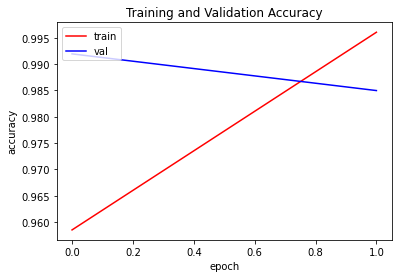

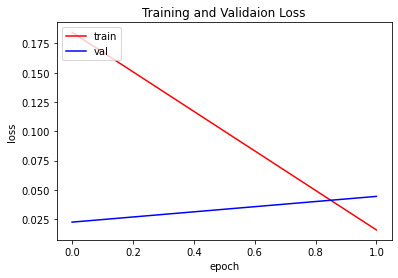

<Figure size 432x288 with 0 Axes>

In [91]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

## Evaluate Model

In [92]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  shuffle = False,
                                                  class_mode='binary')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 2698 images belonging to 2 classes.
2698/2698 [==============================] - 55s 20ms/step - loss: 0.0369 - accuracy: 0.9878
accuracy test:  0.9877687096595764
loss test:  0.036856941878795624


In [0]:
model.save('model.h5')

## Predict Image

Saving fresh-fruit.jpeg to fresh-fruit.jpeg
Saving fresh-fruit2.jpeg to fresh-fruit2.jpeg
Saving fresh-fruit3.jpeg to fresh-fruit3.jpeg
Saving fresh-fruit4.jpeg to fresh-fruit4.jpeg
Saving fresh-fruit5.jpeg to fresh-fruit5.jpeg
Saving fresh-fruit6.jpeg to fresh-fruit6.jpeg
Saving fresh-fruit7.jpeg to fresh-fruit7.jpeg
Saving fresh-fruit8.jpeg to fresh-fruit8.jpeg
Saving fresh-fruit9.jpeg to fresh-fruit9.jpeg
Saving fresh-fruit10.jpeg to fresh-fruit10.jpeg
Saving fresh-fruit11.jpeg to fresh-fruit11.jpeg
Saving fresh-fruit12.jpeg to fresh-fruit12.jpeg
Saving fresh-fruit13.jpeg to fresh-fruit13.jpeg
Saving fresh-fruit14.jpeg to fresh-fruit14.jpeg
Saving fresh-fruit15.jpeg to fresh-fruit15.jpeg
Saving fresh-fruit16.jpeg to fresh-fruit16.jpeg
Saving fresh-fruit17.jpeg to fresh-fruit17.jpeg
Saving rotten-fruit.jpeg to rotten-fruit.jpeg
Saving rotten-fruit2.jpeg to rotten-fruit2.jpeg
Saving rotten-fruit3.jpeg to rotten-fruit3.jpeg
Saving rotten-fruit4.jpeg to rotten-fruit4.jpeg
Saving rotten-

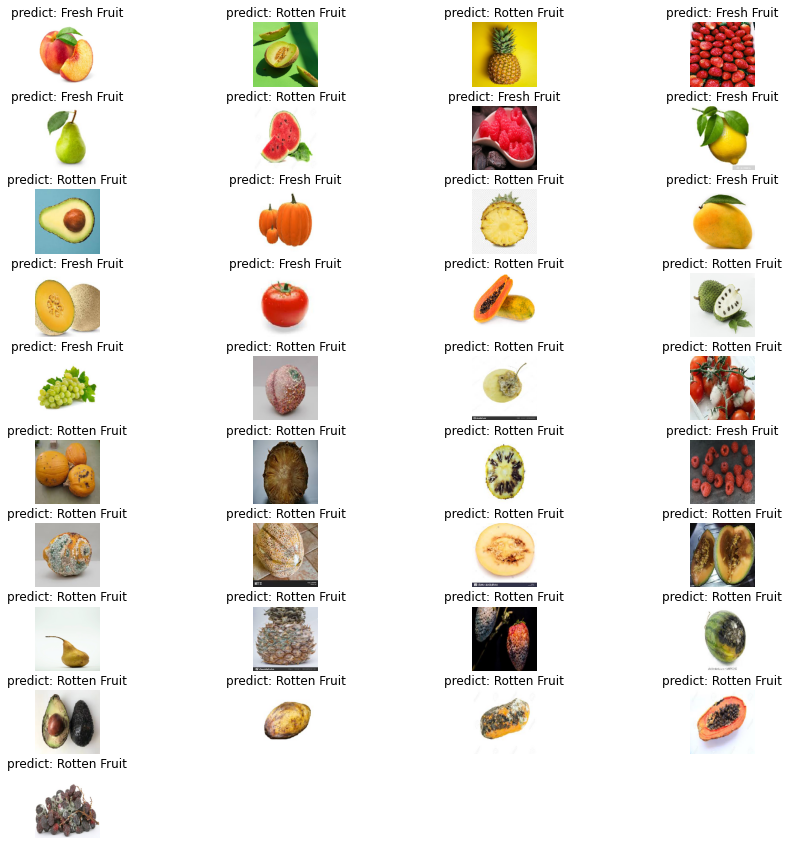

In [94]:
from keras.preprocessing import image
from keras.utils import get_file
import pathlib
import cv2

model_predict = tf.keras.models.load_model('model.h5')
model_predict.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)
  label = np.where(classes[0] > 0.5, 1,0)
  # print(label)
  if label == 0:
    image_name.append(fn)
    predict_result.append('Fresh Fruit')
  else:
    image_name.append(fn)
    predict_result.append('Rotten Fruit')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((len(image_name)/4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
  title = f"predict: {predict_result[n]}"
  plt.title(title)
  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')